In [7]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import math
import cmath
import pylab
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D

In [8]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [9]:
h_int = lambda i: om0

def integr(t):
    g_f = scipy.integrate.quad(h_int, 0, t)
    return g_f[0]

In [28]:
h=0.02#swap 0.0125
tsize = 1000   #5000 
u0 = np.zeros(tsize, dtype=np.cdouble)
a1 = np.zeros(tsize, dtype=np.cdouble)
a2 = np.zeros(tsize, dtype=np.cdouble)
a3 = np.zeros(tsize, dtype=np.cdouble)
nu = np.zeros(tsize, dtype=np.cdouble)

p0 = np.zeros(tsize, dtype=np.cdouble)
alpha1 = np.zeros(tsize, dtype=np.cdouble)
alpha2 = np.zeros(tsize, dtype=np.cdouble)
alpha3 = np.zeros(tsize, dtype=np.cdouble)

om0=15#-2
t=0
eps=0.02

#что будет у гейта вычитаться в функционале
#not -> h
tg0 = 0 # 0 0  
ag1 = 1/(2**0.5)  # 1 1/sqrt{2} 
ag2 = 0 # 0 0 
ag3 = 1/(2**0.5)  # 0 1/(2**0.5) 

#начальные
u0[0] = 1

#конечные
p0[0] = -0.8*(-0.5)#1.0j*cmath.exp(1.0j*integr(t))*tg0
alpha1[0] = 0.1*(-0.5)#1.0j*cmath.exp(1.0j*integr(t))*ag1
alpha2[0] = 0*(-0.5)#1.0j*cmath.exp(1.0j*integr(t))*ag2
alpha3[0] = 0*(-0.5)#1.0j*cmath.exp(1.0j*integr(t))*ag3

fu0 = lambda t, a3, a1, nu: -om0/2*a3+nu*a1
fa1 = lambda t, a2, u0, nu: om0/2*a2-nu*u0
fa2 = lambda t, a1, a3, nu: -om0/2*a1-nu*a3
fa3 = lambda t, a2, u0, nu:om0/2*u0+nu*a2

fp0 = lambda t, alpha3, alpha1, nu: om0/2*alpha3-nu*alpha1
falpha1 = lambda t, p0, alpha2, nu: -om0/2*alpha2+nu*p0
falpha2 = lambda t, alpha1, alpha3, nu: om0/2*alpha1+nu*alpha3
falpha3 = lambda t, alpha2, nu, p0: -om0/2*p0-nu*alpha2


fnu = lambda eps, t, u0, a1, a2, a3, alpha1, p0, alpha3, alpha2: (a1*p0-u0*alpha1-a3*alpha2+a2*alpha3)*(-1)/eps
nu[0]=fnu(eps, t, u0[0], a1[0], a2[0], a3[0], alpha1[0], p0[0], alpha3[0], alpha2[0])

In [29]:
for i in range(0, tsize-1): 
    ku0_1 = h*fu0(t, a3[i], a1[i], nu[i])
    ka1_1 = h*fa1(t, a2[i], u0[i], nu[i])
    ka2_1 = h*fa2(t, a1[i], a3[i], nu[i])
    ka3_1 = h*fa3(t, a2[i], u0[i], nu[i])
    
    kp0_1 = h*fp0(t, alpha3[i], alpha1[i], nu[i])
    kalpha1_1 = h*falpha1(t, p0[i], alpha2[i], nu[i])
    kalpha2_1 = h*falpha2(t, alpha1[i], alpha3[i], nu[i])
    kalpha3_1 = h*falpha3(t, alpha2[i], nu[i], p0[i])
    
    ku0_2 = h*fu0(t+h/2, a3[i]+ka3_1/2, a1[i]+ka1_1/2, nu[i])
    ka1_2 = h*fa1(t+h/2, a2[i]+ka2_1/2, u0[i]+ku0_1/2, nu[i])
    ka2_2 = h*fa2(t+h/2, a1[i]+ka1_1/2, a3[i]+ka3_1/2, nu[i])
    ka3_2 = h*fa3(t+h/2, a2[i]+ka2_1/2, u0[i]+ku0_1/2, nu[i]) 
    
    kp0_2 = h*fp0(t+h/2, alpha3[i]+kalpha3_1/2, alpha1[i]+kalpha1_1/2, nu[i])
    kalpha1_2 = h*falpha1(t+h/2, p0[i]+kp0_1/2, alpha2[i]+kalpha2_1/2, nu[i])
    kalpha2_2 = h*falpha2(t+h/2, alpha1[i]+kalpha1_1/2, alpha3[i]+kalpha3_1/2, nu[i])
    kalpha3_2 = h*falpha3(t+h/2, alpha2[i]+kalpha2_1/2, nu[i], p0[i]+kp0_1/2)
    
    ku0_3 = h*fu0(t+h/2, a3[i]+ka3_2/2, a1[i]+ka1_2/2, nu[i])
    ka1_3 = h*fa1(t+h/2, a2[i]+ka2_2/2, u0[i]+ku0_2/2, nu[i])
    ka2_3 = h*fa2(t+h/2, a1[i]+ka1_2/2, a3[i]+ka3_2/2, nu[i])
    ka3_3 = h*fa3(t+h/2, a2[i]+ka2_2/2, u0[i]+ku0_2/2, nu[i])
    
    kp0_3 = h*fp0(t+h/2, alpha3[i]+kalpha3_2/2, alpha1[i]+kalpha1_2/2, nu[i])
    kalpha1_3 = h*falpha1(t+h/2, p0[i]+kp0_2/2, alpha2[i]+kalpha2_2/2, nu[i])
    kalpha2_3 = h*falpha2(t+h/2, alpha1[i]+kalpha1_2/2, alpha3[i]+kalpha3_2/2, nu[i])
    kalpha3_3 = h*falpha3(t+h/2, alpha2[i]+kalpha2_2/2, nu[i], p0[i]+kp0_2/2)
   
    ku0_4 = h*fu0(t+h, a3[i]+ka3_3, a1[i]+ka1_3, nu[i])
    ka1_4 = h*fa1(t+h, a2[i]+ka2_3, u0[i]+ku0_3, nu[i])
    ka2_4 = h*fa2(t+h, a1[i]+ka1_3, a3[i]+ka3_3, nu[i])
    ka3_4 = h*fa3(t+h, a2[i]+ka2_3, u0[i], nu[i])
    
    kp0_4 = h*fp0(t+h, alpha3[i]+kalpha3_3, alpha1[i]+kalpha1_3, nu[i])
    kalpha1_4 = h*falpha1(t+h, p0[i]+kp0_3, alpha2[i]+kalpha2_3, nu[i])
    kalpha2_4 = h*falpha2(t+h, alpha1[i]+kalpha1_3, alpha3[i]+kalpha3_3, nu[i])
    kalpha3_4 = h*falpha3(t+h, alpha2[i]+kalpha2_3, nu[i], p0[i]+kp0_3)
    
    u0[i+1] = u0[i] + (ku0_1 + 2*ku0_2 + 2*ku0_3 + ku0_4)/6
    a1[i+1] = a1[i] + (ka1_1 + 2*ka1_2 + 2*ka1_3 + ka1_4)/6
    a2[i+1] = a2[i] + (ka2_1 + 2*ka2_2 + 2*ka2_3 + ka2_4)/6
    a3[i+1] = a3[i] + (ka3_1 + 2*ka3_2 + 2*ka3_3 + ka3_4)/6
      
    p0[i+1] = p0[i] + (kp0_1 + 2*kp0_2 + 2*kp0_3 + kp0_4)/6
    alpha1[i+1] = alpha1[i] + (kalpha1_1 + 2*kalpha1_2 + 2*kalpha1_3 + kalpha1_4)/6
    alpha2[i+1] = alpha2[i] + (kalpha2_1 + 2*kalpha2_2 + 2*kalpha2_3 + kalpha2_4)/6
    alpha3[i+1] = alpha3[i] + (kalpha3_1 + 2*kalpha3_2 + 2*kalpha3_3 + kalpha3_4)/6
    
    nu[i+1] = fnu(eps, t, u0[i+1], a1[i+1], a2[i+1], a3[i+1], alpha1[i+1], p0[i+1], alpha3[i+1], alpha2[i+1])
   
    t += h

In [30]:
Jmin=1000000
jg = np.zeros(200, dtype=np.cdouble)
l=-1
f_int = lambda i: nu[n]**2
for n in range(0, 200):
    nu_i = scipy.integrate.quad(f_int, 0, n)
    aj = abs(a1[n]*ag1)+abs(a2[n]*ag2)+abs(a3[n]*ag3)
    J = 1-abs((u0[n]*tg0)) - abs(aj)# + eps*nu_i[0]/2
    jg[n]=J
    print(J, n, eps*nu_i[0]/2)

1.0 0 0.0
0.8765288440309366 1 0.06060966645787169
0.7487064009504432 2 0.22204395109114575
0.6182996211696894 3 0.5447556722062045
0.488948801531629 4 1.001160251978575
0.36700085916949954 5 1.374129507051993
0.26059798510958476 6 1.3782232586874554
0.17656620343074647 7 1.0034729824537083
0.11763129707430375 8 0.5464033865022075
0.0829162078886454 9 0.23983707043077704
0.07054070109584165 10 0.0952048934176933
0.07921990822307623 11 0.039130026260357366
0.10825300425472228 12 0.018862278011066217
0.15700033902336685 13 0.011602328789928935
0.22453665285543434 14 0.009396079158473685
0.3095364609882104 15 0.009889400528638516
0.41028013891521053 16 0.013038480468940185
0.5247084349878648 17 0.020610940843020415
0.6504992376009239 18 0.03739221368355561
0.7851585472754985 19 0.07453755624167609
0.9261163378791747 20 0.15607119118847523
0.9291980973512686 21 0.32730594576593924
0.7833554251833208 22 0.6538724994767603
0.639076456803449 23 1.1812554728081524
0.4995635226669798 24 1.83050

In [6]:
l=10
print(u0[l])
print(a1[l], a2[l], a3[l])
print(p0[l])
print(alpha1[l], alpha2[l], alpha3[l])


0j
0j 0j 0j
0j
0j 0j 0j


-0.025420190048965716


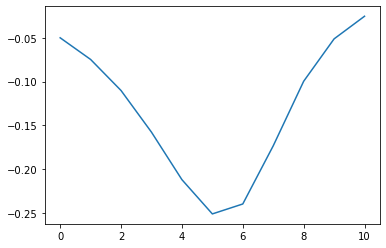

In [19]:
nug = np.zeros(11)
for n in range (0,11):
    nug[n]=nu[n]*eps
plt.plot(nug)    
print(nug[n])

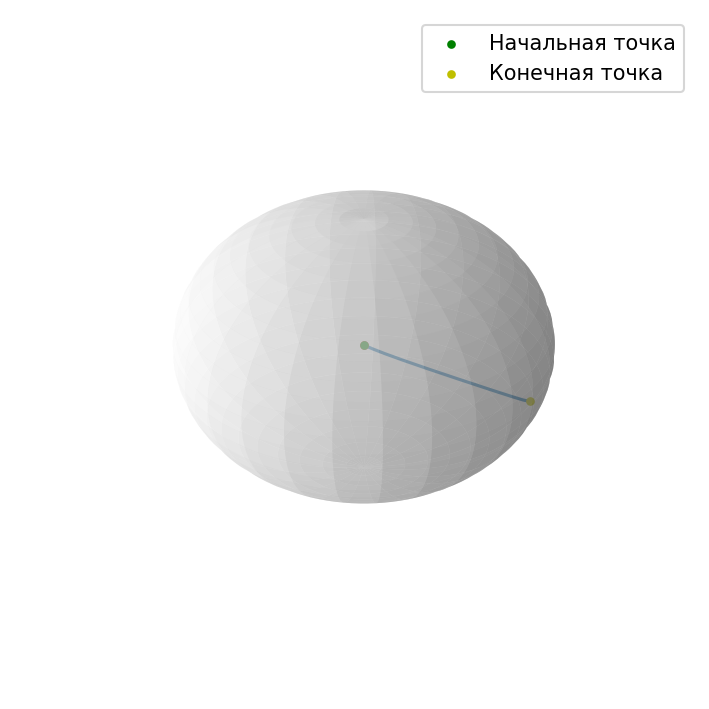

In [20]:
F=11
ag1 = np.zeros(F)
ag2 = np.zeros(F)
ag3 = np.zeros(F)
fig = plt.figure(figsize=(6,6), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='w', linewidth=0, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.axis('off')
for n in range(0, F):
    ag1[n]=a1[n]
    ag2[n]=a2[n]
    ag3[n]=a3[n]
ax.scatter([0], [0], [0], color="r", s=10)
ax.scatter([ag1[0]], [ag2[0]], [ag3[0]], color="g", s=10, label="Начальная точка")
ax.scatter([ag1[F-1]], [ag2[F-1]], [ag3[F-1]], color="y", s=10, label="Конечная точка")
ax.plot(ag1, ag2, ag3)
ax.legend()

0.9873799792212608 -0.00701042352045498 -0.05699641150361332


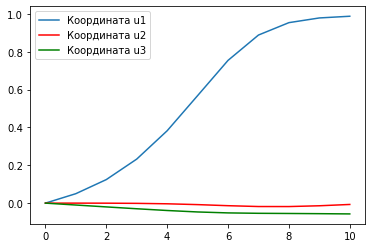

In [21]:
plt.plot(ag1,label="Координата u1")
plt.plot(ag2, color='r', label="Координата u2")
plt.plot(ag3, color='g', label="Координата u3")
print(ag1[F-1], ag2[F-1], ag3[F-1])
plt.legend()

0.14805471077389468


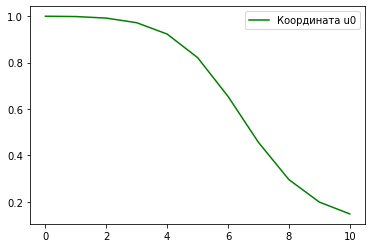

In [22]:
ag0 = np.zeros(F)
for n in range(0, F):
    ag0[n]=u0[n]
plt.plot(ag0, color='g', label="Координата u0")
print(ag0[F-1])
plt.legend()